# How far would a skydiver have to fall to break the sound barrier in a non-uniform atmosphere?

## Learning Objectives

After completing this exercise set, the student will be able to:
- Compute the movement of a falling object using the Euler-Cromer method **(Exercises 1 - 6)**
- Implement a model for air resistance with a varying air density **(Exercises 2 - 5)**
- Evaluate the resonability of the model using the graphs of motion **(Exercises 7 - 8)**
- Solve a problem using a root-finding algoritm known as the bisection method **(Exercises 9 - 10)**

## Introduction: Breaking the sound barrier

Sound moves through the air with a speed of 343m/s. When something moves through the air at a higher speed than sound, it creates a loud shockwave called a <a href="https://en.wikipedia.org/wiki/Sonic_boom">sonic boom</a>. Sonic booms are often created by flying bullets, figher jets, and even bullwhips. What would it take for a human to move fast enough to produce a sonic boom? Is it possible to reach such a high speed simply by falling through the air?

The answer is yes! It has been acheived on a couple of occasions by people who jumped from extreme heights. Notable mentions include <a href="https://newatlas.com/record-setting-manned-balloon-flight-skydive-red-bull-baumgartner/24553/">Felix Baumgartner</a> who fell from 39045 meters in 2012, becoming the first person to break the sound barrier during a fall, and <a href="https://www.nytimes.com/2014/10/25/science/alan-eustace-jumps-from-stratosphere-breaking-felix-baumgartners-world-record.html">Alan Eustace</a> who broke Felix's record high jump in 2014 with a fall from 41419 meters.

The question then becomes: What is the minimum fall height necessary to break the sound barrier?

## I. Modeling the Forces

To answer this you will need to calculate the movement of a falling skydiver. To calculate the fall you will first need to model the different forces acting on the skydiver. When you have the forces and initial conditions of the fall, you can calculate the movement during the entire fall.

### Gravity - The gas pedal

The gravitational force between two objects is given by $F_g = \frac{GMm}{r^2}$,
where $G$ is the gravitational constant $6.67\times10^-11\frac{\mathrm{Nm}^2}{\mathrm{kg}^2}$, $M$ is the mass of one of the objects, $m$ is the mass of the other object and $r$ is the distance between the objects. The force acts on both of the objects, and is pointed from one object to the other. Furthermore, Newtons second law gives us that:

$$
\begin{align*}
F_g = ma \Rightarrow a = \frac{F_g}{m} = \frac{GMm}{r^2m} = \frac{GM}{r^2}
\end{align*}
$$

This means that the gravitational acceleration at any given time is dependent only on the mass of the object pulling on you, and your distance to it. **Remember to treat the force and acceleration as negative in your code, as the positive direction is up (though it doesn't have to be), while gravity acts downwards**.

Let's start off by importing the necessary libraries.

In [29]:
import numpy as np #numpy is used for storing numbers and doing calculations effectively
import matplotlib.pyplot as plt #matplotlib is used for plotting
import math

**Exercise 1:**

Write a function `gravAccel(h)` that takes the height **above the ground** as a parameter, and returns the resultant gravitational **acceleration**. Make sure to take the Earth's radius and the direction of the force into account.

In [31]:
G = 6.674E-11 #Gravitational constant
M = 5.972E24 #Mass of the Earth
R_Earth = 6.371E6 #Radius of the Earth, distance from center to surface
import math
def gravAccel(h):
    G = 6.67430e-11
    M = 5.972e24
    R_Earth = 6.371e6


    distance = R_Earth + h


    g = G * M / distance**2

    direction = "towards the center of the Earth"

    return g, direction



### Air resistance - The brakes

Air resistance (often called drag) is the force which the air exerts on an object moving through it, acting in the direction opposite of the relative motion. For the purpose of this exercise set, we will be using the drag equation to calculate air resistance. The drag equation works well at relatively high velocities, which is what we will be looking at.

The drag equation is given by $F_D = \frac{1}{2} \rho v^2 C_D A$ where $\rho$ is the air density, $v$ is the velocity, $C_D$ is the drag coefficient, and $A$ is the cross sectional area. For a skydiver, a drag coefficient $C_D = 0.3$ and a cross sectional area $A = 1\mathrm{m}^2$ are <a href="https://www.longdom.org/open-access/buoyancy-explains-terminal-velocity-in-skydiving-2168-9792-1000189.pdf">good enough estimates</a> for rough calculations.

**Exercise 2:**

Write a function `drag(v, rho)` that takes velocity and air density as parameters and returns the **force due to drag**. Make sure that the force acts in the direction opposite of the velocity.

In [33]:
C_D = 0.3 #Drag coeffiecent
A = 1 #m^2

def drag(v, rho):

    C_D = 0.3
    A = 1.0


    FD = 0.5 * rho * v**2 * C_D * A


    return -FD if v > 0 else FD


**Exercise 3:**

**a)** Let's assume that the atmosphere has a uniform density of $1.225 \mathrm{kg/m}^3$ (the average density of air at sea level) all the way up. Using a gravitational acceleration of $9.81 \mathrm{m/s}^2$, a mass of $80 \mathrm{kg}$, and air density of $1.225 \mathrm{kg/m}^3$, find the velocity for which the gravitational and drag forces are equal *(you can do this by hand or by using python as a calculator)*.

In [35]:
m = 80 #kg
rho = 1.225 #kg/m^3
g = 9.81 #m/s^2

def find_velocity(mass, g, rho):
    CD = 0.3
    A = 1.0

    Fg = mass * g


    v = ((2 * Fg) / (rho * CD * A)) ** 0.5

    return v

mass = 80
g = 9.81
rho = 1.225


velocity = find_velocity(mass, g, rho)
print(f"The terminal velocity is {velocity} m/s.")

The velocity for which the gravitational and drag forces are equal is 65.35304436798079 m/s.


Your result from **a)** is the terminal velocity. Below this velocity, the gravitational force exceeds the drag force, and acceleration is negative (downward).  Upon reaching this velocity, acceleration becomes zero and the velocity becomes constant.

**b)** Given your result in **a)**, would you be able to break the sound barrier by falling through an atmosphere with a constant air density of $1.225\mathrm{kg/m}^3$? Justify your answer.

Given the velocity i got in part a, We would not, as to break the sound barrier, we most move as 298 meters per second. This several times fast than the 65.35 meter per second we got in part a.

### The varying density of the atmosphere

To make our model more realistic and interesting, we can introduce varying air density.

Density is a measure of mass per unit volume. At sea level, air has a density of $1.225 \mathrm{kg/m}^3$. This means that a cubic meter of air at sea level has a mass of $1.225\mathrm{kg}$. As altitude increases however, the air density will decrease. This lower air density reduces drag, making it easier to reach the speed needed to break the sound barrier.

Density, pressure, temperature and height are connected in complicated ways in the atmosphere. Moreover, these properties change all the time depending on location, weather effects, etc. Nevertheless, these properties are very important and useful to understand and pin down. We will be using a simplified model of the Earth's atmosphere offered by the <a href="https://web.archive.org/web/20170118122048/https://www.grc.nasa.gov/WWW/K-12/airplane/atmosmet.html">NASA educational website</a>, which will be sufficient for the purposes of this exercise set.

From the model on the website, a function for the air density given height can be written:

In [36]:
#Takes the height in meters as an argument and returns the air density at that height in kg/m^3
def airDensity(h):
    if h > 25000:
        T = -131.21 + 0.00299 * h
        p = 2.488 * ((T + 273.1) / 216.6)**(-11.388)
    elif 11000 < h <= 25000:
        T = -56.46
        p = 22.65 * np.exp(1.73 - 0.000157 * h)
    else:
        h = max(0, h) #Negative heights make no sense in this model, keep that in mind when analyzing results
        T = 15.04 - 0.00649 * h
        p = 101.29 * ((T + 273.1) / 288.08)**(5.256)
    #This formula was made to fit observed values of the air density. It is not a physical equation or law
    return(p / (0.2869 * (T + 273.1))) #The air density

Plot the density of the atmosphere up to a height of 50000 meters.

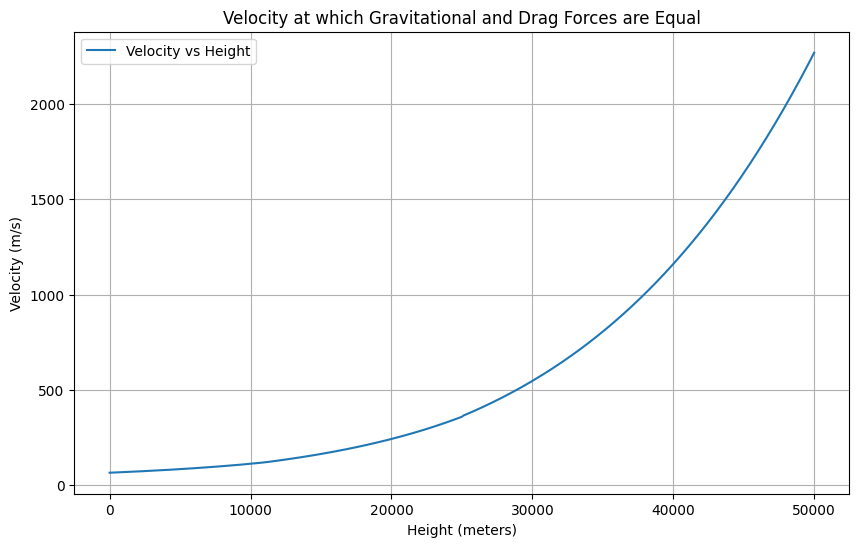

In [37]:
def find_velocity(mass, g, rho):
    CD = 0.3
    A = 1.0
    Fg = mass * g
    v = ((2 * Fg) / (rho * CD * A)) ** 0.5
    return v


mass = 80  # kg
g = 9.81  # m/s^2

s
heights = np.arange(0, 50001, 100)
velocities = []

t
for height in heights:
    rho = airDensity(height)
    velocity = find_velocity(mass, g, rho)
    velocities.append(velocity)


plt.figure(figsize=(10, 6))
plt.plot(heights, velocities, label='Velocity vs Height')
plt.xlabel('Height (meters)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity at which Gravitational and Drag Forces are Equal')
plt.legend()
plt.grid(True)
plt.show()

**Exercise 4:**

**a)** Use the `airDensity(h)` function defined above to find the air density at an altitude of 39045 meters.

In [52]:

def airDensity(h):
    if h > 25000:
        T = -131.21 + 0.00299 * h
        p = 2.488 * ((T + 273.1) / 216.6)**(-11.388)
    elif 11000 < h <= 25000:
        T = -56.46
        p = 22.65 * np.exp(1.73 - 0.000157 * h)
    else:
        h = max(0, h) #Negative heights make no sense in this model, keep that in mind when analyzing results
        T = 15.04 - 0.00649 * h
        p = 101.29 * ((T + 273.1) / 288.08)**(5.256)
    #This formula was made to fit observed values of the air density. It is not a physical equation or law
    return(p / (0.2869 * (T + 273.1))) #The air density
altitude_39045 = 39045
density_at_39045 = airDensity(altitude_39045)
print(f"The air density at an altitude of {altitude_39045} meters is {density_at_39045} kg/m^3.")



The air density at an altitude of 39045 meters is 0.004448744078718748 kg/m^3.


Find the terminal velocity for this air density and the parameters from **exercise 3**. Would you be able to break the sound barrier by falling through air with this density? Explain your answer.

In [54]:
m = 80 #kg
rho = 0.004 #kg/m^3
g = 9.81 #m/s^2

def find_velocity(mass, g, rho):
    CD = 0.3
    A = 1.0

    Fg = mass * g


    v = ((2 * Fg) / (rho * CD * A)) ** 0.5

    return v

mass = 80
g = 9.81
rho = 0.004


velocity = find_velocity(mass, g, rho)
print(f"The terminal velocity is {velocity} m/s.")

The terminal velocity is 1143.678276439664 m/s.


In this case, yes. The sound barriar is at 298 meters per second, At 1143.7 meters per second, your terminal velocity is almost 4 times faster then is needed to break the sound barrier.

**b)** What would the answer to **a)** be with the air density at 1000 meters?  Would you be able to break the sound barrier by falling through air with this density? Explain your answer.

In [57]:
h = 1000
m = 80 #kg
rho = 1.113 #kg/m^3
g = 9.81 #m/s^2

def find_velocity(mass, g, rho):
    CD = 0.3
    A = 1.0

    Fg = mass * g


    v = ((2 * Fg) / (rho * CD * A)) ** 0.5

    return v

mass = 80
g = 9.81
rho = 1.113


velocity = find_velocity(mass, g, rho)
print(f"The terminal velocity is {velocity} m/s.")

altitude_1000 = 1000
density_at_1000 = airDensity(altitude_1000)
print(f"The air density at an altitude of {altitude_1000} meters is {density_at_1000} kg/m^3.")

The terminal velocity is 68.5624432567636 m/s.
The air density at an altitude of 1000 meters is 1.113268305664992 kg/m^3.


We would not break the sound barrier. The air density at 1000 meters is very close to the air density at sea level. Our terminal velocity is only 3 meters per second faster.

**Exercise 5:**

Write a function `acceleration(h, v)` that takes the height above the ground and velocity as parameters, and returns the acceleration due to the combined affects of gravity and drag. Use the `gravAccel`, `drag` and `airDensity` functions defined previously. Make sure to use the acceleration from drag, not the force. Continue to assume that the mass of the skydiver is $80\mathrm{kg}$.

In [82]:
def drag(v, rho):
    CD = 0.3
    A = 1.0
    FD = 0.5 * rho * v**2 * CD * A
    return -FD if v > 0 else FD


def gravAccel():
    return 9.81


def acceleration(h, v):
    mass = 80
    g = gravAccel()
    rho = airDensity(h)


    Fd = drag(v, rho)
    print(Fd)
    ad = Fd / mass


    a_total = g + ad

    return a_total


## II. Calculating the fall through a non-uniform atmosphere

So far you have defined a function for one's acceleration when falling through a non-uniform atmosphere. Furthermore, if you assume that the fall starts off from a given height with no velocity, you also have the initial conditions of the fall. Combining these ingredients, you can simulate the entire fall.

Later, you are going to find the starting height which is necessary to break the sound barrier. Before that though, you will calculate a single fall to see how the calculations work.

### Initializing variables and arrays

The simulation method that will be used in this exercise set is the Euler-Cromer method. Like many numerical methods for simulating motion, it uses the fact that although velocity and acceleration might be changing constantly, if you look at them over a very tiny time step they are essentially constant. Using this principle, you can calculate a long series of linear motions with constant velocity, achieving surprisingly accurate results.

To implement the method, you will need to know how long to run the simulation, and how short each time step should be. 5000 time steps of 0.05 seconds will work well here, although this resolution will be insufficient for more detailed simulations. To make the code more efficient, we will create some arrays to store our values. Arrays are similar to lists, however the size cannot be modified and they are in many cases more computationally efficient.

In [66]:
#These values gives us a good look at a fall from 0 to 100km
n = 5000  #The number of steps in the Euler-Cromer calculation
dt = 0.05 #The size of each time-step in the Euler-Cromer calculation

#Create an evenly spaced array of n time values, ranging from 0 to n*dt
time = np.linspace(0, n*dt, n)

#Initialize position, velocity, and acceleration arrays to zero, matching the size of the time array
pos = np.zeros(n) #Height in meters. The array is length n
vel = np.zeros(n) #Velocity in m/s
acc = np.zeros(n) #Acceleration in m/s^2

#Assume the initial height is 41419 m (the world record fall height)
pos[0] = 41419

### The Euler-Cromer loop

**EXERCISE 6:**

Do the Euler-Cromer calculation of a fall through a non-uniform atmosphere with the initial conditions from above, and an acceleration given by the `acceleration(h, v)` function (the current position during the loop will in this case be `pos[i]`).

Here is a template for how the Euler-Cromer method can look when storing values in arrays:

    for i in range(n-1):
        acc[i] = function(arguments)
        vel[i+1] = vel[i] + acc[i] * dt
        pos[i+1] = pos[i] + vel[i+1] * dt
    
    #The last value of this array needs to be calculated separately
    acc[n-1] = function(arguments)

Based on this template, calculate the acceleration, velocity, and position for each time value.

In [79]:
n = 5000
dt = 0.05

# Create an evenly spaced array of n time values, ranging from 0 to n*dt
time = np.linspace(0, n*dt, n)

# Initialize position, velocity, and acceleration arrays to zero, matching the size of the time array
pos = np.zeros(n) # Height in meters. The array is length n
vel = np.zeros(n) # Velocity in m/s
acc = np.zeros(n) # Acceleration in m/s^2

# Assume the initial height is 41419 m (the world record fall height)
pos[0] = 41419

# Calculate acceleration, velocity, and position for each time step using Euler-Cromer method
for i in range(n-1):
    acc[i] = acceleration(pos[i], vel[i])
    vel[i+1] = vel[i] + acc[i] * dt
    pos[i+1] = pos[i] - vel[i+1] * dt

# Calculate the last value of acceleration
acc[n-1] = acceleration(pos[n-1], vel[n-1])

# Print the final values of acceleration, velocity, and position
print(f"Final acceleration: {acc[-1]} m/s^2")
print(f"Final velocity: {vel[-1]} m/s")
print(f"Final position: {pos[-1]} meters")

Final acceleration: -0.031007683487501936 m/s^2
Final velocity: 65.41317487562135 m/s
Final position: -417.4436544477366 meters


### Plotting the results

Plot the position, velocity, and acceleration as a function of time.

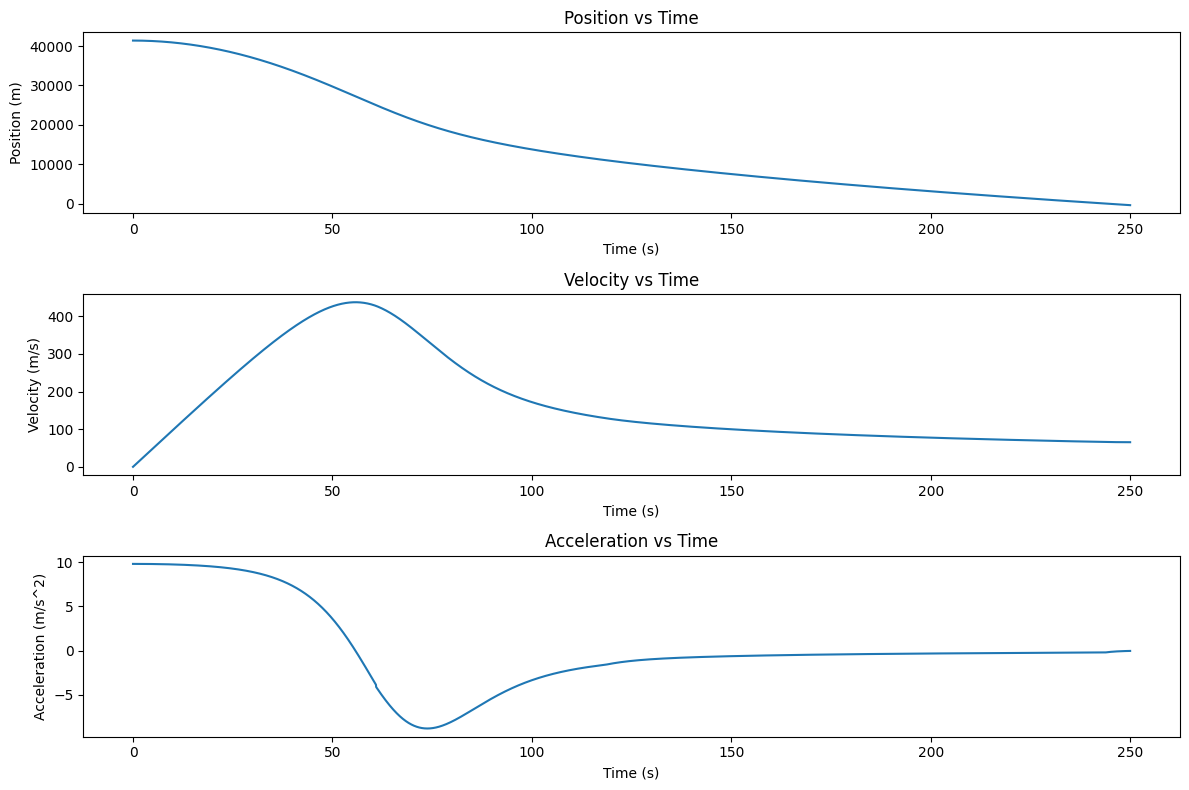

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time, pos)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position vs Time')

plt.subplot(3, 1, 2)
plt.plot(time, vel)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')

plt.subplot(3, 1, 3)
plt.plot(time, acc)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs Time')

plt.tight_layout()
plt.show()

**Exercise 7:**

**a)** If all went well, your acceleration graph should have a somewhat strange shape (it should not be constant). Justify this shape using the formula for air resistance. In particular, try to explain the value of the initial acceleration, the acceleration with the largest positive value and the acceleration near the end.

The formula for air resistace is (1/2)(p)(A)(C_D)v^2 where p is density of the medium, A is the crosssection area, and C_D is the drag coeffiecant. at the top, v or velocity is equal to zero. so air resistance is zero. Once you reach terminal velicoty, acceleration and air resistance are equal. But as you fall down, air density increases, making you decelerate instead of have no acceleraion.

**b)** What effect would increasing the weight of the skydiver have on your results?

Increasing the weight of the Skydiver, assuming the size remains the same, With increase terminal velocity.

**c)** What would change about the shape of the acceleration graph if the air density was constant?

The Acceleration graph would reach zero, and not dip into the negatives.

**Exercise 8:**

Did the skydiver break the sound barrier (343m/s) during the fall? If so, do you think he or she could have done so with a lower initial height?

They did, and would have at a much lower height. Acorrding the graph in exercize 3, about 26000 meters would have done.

## III. The Bisection Method - Finding the height necessary to break the sound barrier

We know that it's possible to break the sound barrier by falling from high enough up in the atmosphere. But what is the minimum necessary height?

Your next task is to find the lowest input height $h$ necessary to give you a top speed of 343m/s. To solve this kind of problem, you can use the **bisection method**. The bisection method is a search algorithm that finds when a given function returns a desired value, within a certain tolerance. It is significantly more computationally efficient than a brute force method (i.e., testing every value until you find the one you want).

To implement the bisection method, you start by defining your search space. That is, you start by defining the upper and lower bounds of the range of values you will be searching over—call them the **ceiling** and the **floor**. In practice, it's helpful to choose values that are much higher and lower than your expected values, since some extra padding either way will not significantly affect the speed of the search.

With these boundaries specified, the algorithm proceeds as follows: first, you evaluate your function using a value halfway between the **floor** and **ceiling** (call this the **middle**). If your function returns results that are too low, you know that the actual value will be above the middle, so you set the **floor's** value equal to the **middle** (raise the floor). If the returned value is too high, you know the actual value you are looking for will be below the middle, and you set the **ceiling** equal to the **middle** (lower the ceiling). You then repeat this process with the new **floor** and **ceiling**, until the values of the **floor** and **ceiling** are very close together. Then, depending on what you are after, the final value of the floor or ceiling will be your final awnser.

You can see an illustration of how this method works in the attached figure.

<img src="https://raw.githubusercontent.com/KarlHenrik/Jupyter-Notebook-Projects/master/_build/features/activities/FallingFasterThanSound/bisection4.png" alt="Drawing" style="width: 90%;"/>

*An illustration of four iterations of the bisection method. For implementation in other contexts, please refer to a more <a href="https://en.wikipedia.org/wiki/Bisection_method">general desription</a> of the method.*

In the previous section, you wrote code to calculate the motion of an object falling through the atmosphere. Your next task will be to turn this code into a function, `maxVel(h)`, which takes in a starting height as a parameter, runs the Euler-Cromer calculation, and returns the top speed reached during the fall. You can then apply the bisection method to this function to find the input height necessary to break the sound barrier (for simplicity's sake, take the final **ceiling** as your answer). You are free to choose your own search space, but we would suggest starting with floor of 0 meters and a ceiling of 100,000 meters (known as the Karman Line, where space begins).

**Exercise 9:**

To implement the bisection method as described above, you will first need a function that helps you determine whether the sound barrier was broken during the fall or not.  Write a function `maxVel(h)` that takes a starting height above the ground as an argument, runs the Euler-Cromer calculation like you did in **Exercise 5**, and returns the top speed reached during the fall.

In [90]:

def maxVel(h):
    n = 5000
    dt = 0.05


    time = np.linspace(0, n*dt, n)


    pos = np.zeros(n)
    vel = np.zeros(n)
    acc = np.zeros(n)

    pos[0] = h
    for i in range(n-1):
        acc[i] = acceleration(pos[i], vel[i])
        vel[i+1] = vel[i] + acc[i] * dt
        pos[i+1] = pos[i] - vel[i+1] * dt


    acc[n-1] = acceleration(pos[n-1], vel[n-1])


    return np.max(vel)

top_speed = maxVel(41419)
print(f"The top speed reached during the fall from 41419 meters is {top_speed} m/s.")

{0.0}
{-0.00011480007177400453}
{-0.0004592033594932216}
{-0.001033217802341051}
{-0.0018368557804619926}
{-0.0028701341152717473}
{-0.004133074069873003}
{-0.005625701349576954}
{-0.007348046102530481}
{-0.009300142920449086}
{-0.011482030839455563}
{-0.01389375334102442}
{-0.016535358353032218}
{-0.019406898250913535}
{-0.02250842985892294}
{-0.025840014451502653}
{-0.029401717754756408}
{-0.03319360994802925}
{-0.0372157656655927}
{-0.04146826399843712}
{-0.04595118849616901}
{-0.05066462716901535}
{-0.055608672489933314}
{-0.06078342139682699}
{-0.06618897529486997}
{-0.07182544005893429}
{-0.077692926036126}
{-0.08379154804842714}
{-0.09012142539544378}
{-0.09668268185726199}
{-0.10347544569740964}
{-0.11049984966592348}
{-0.11775603100252721}
{-0.12524413143991162}
{-0.13296429720712477}
{-0.1409166790330698}
{-0.14910143215010613}
{-0.15751871629776257}
{-0.1661686957265556}
{-0.17505153920191488}
{-0.1841674200082153}
{-0.19351651595292196}
{-0.20309900937083405}
{-0.2129150871

**Exercise 10:**

**a)** Implement the bisection method as described above. Start with a floor of 0 m and a ceiling of 100,000 m, and iterate 20 times. Use the function `maxVel` from exercise 9.

In [93]:
def bisection_method(floor, ceiling, iterations):
    for _ in range(iterations):
        mid = (floor + ceiling) / 2
        max_velocity = maxVel(mid)

        if max_velocity > 343:
            ceiling = mid
        else:
            floor = mid

    return mid


floor_height = 0
ceiling_height = 100000
iterations = 20

min_height_for_sound_barrier_breaking = bisection_method(floor_height, ceiling_height, iterations)
print(f"The minimum height necessary to reach a top speed of 343 m/s is approximately {min_height_for_sound_barrier_breaking} meters.")

Streaming output truncated to the last 5000 lines.
{-0.0003366431994394857}
{-0.0013465822619915715}
{-0.0030298409484806267}
{-0.005386455772807613}
{-0.008416476002700192}
{-0.012119963660695784}
{-0.01649699352535771}
{-0.021547653132724335}
{-0.02727204277799129}
{-0.033670275517426775}
{-0.04074247717051944}
{-0.0484887863223604}
{-0.056909354326256614}
{-0.06600434530657937}
{-0.07577393616184352}
{-0.08621831656802201}
{-0.09733768898209146}
{-0.109132268645812}
{-0.12160228358973958}
{-0.13474797463747212}
{-0.14856959541012663}
{-0.16306741233105276}
{-0.17824170463077538}
{-0.19409276435217268}
{-0.2106208963558871}
{-0.22782641832596842}
{-0.2457096607757502}
{-0.264270967053959}
{-0.28351069335105555}
{-0.30342920870581364}
{-0.3240268950121223}
{-0.3453041470260342}
{-0.3672613723730302}
{-0.3898989915555367}
{-0.41321743796065585}
{-0.43721715786814425}
{-0.4618986104586148}
{-0.48726226782197407}
{-0.5133086149660978}
{-0.5400381498257315}
{-0.5674513832716245}
{-0.59554

**b)** Print out the final value of the ceiling, which will be your answer. Also print out the final value of the floor. What is the biggest possible error your awnser can have? How can you reduce it?

In [96]:
def bisection_method(floor, ceiling, iterations):
    for _ in range(iterations):
        mid = (floor + ceiling) / 2
        max_velocity = maxVel(mid)

        if max_velocity > 343:
            ceiling = mid
        else:
            floor = mid

    return floor, ceiling


floor_height = 0
ceiling_height = 100000
iterations = 20

final_floor, final_ceiling = bisection_method(floor_height, ceiling_height, iterations)
print(f"The final value of the floor is {floor_height} meters.")
print(f"The final value of the ceiling is {final_ceiling} meters.")

biggest_possible_error = (final_ceiling - final_floor) / 2
print(f"The biggest possible error is {biggest_possible_error} meters.")


Streaming output truncated to the last 5000 lines.
{-0.0030298409484806267}
{-0.005386455772807613}
{-0.008416476002700192}
{-0.012119963660695784}
{-0.01649699352535771}
{-0.021547653132724335}
{-0.02727204277799129}
{-0.033670275517426775}
{-0.04074247717051944}
{-0.0484887863223604}
{-0.056909354326256614}
{-0.06600434530657937}
{-0.07577393616184352}
{-0.08621831656802201}
{-0.09733768898209146}
{-0.109132268645812}
{-0.12160228358973958}
{-0.13474797463747212}
{-0.14856959541012663}
{-0.16306741233105276}
{-0.17824170463077538}
{-0.19409276435217268}
{-0.2106208963558871}
{-0.22782641832596842}
{-0.2457096607757502}
{-0.264270967053959}
{-0.28351069335105555}
{-0.30342920870581364}
{-0.3240268950121223}
{-0.3453041470260342}
{-0.3672613723730302}
{-0.3898989915555367}
{-0.41321743796065585}
{-0.43721715786814425}
{-0.4618986104586148}
{-0.48726226782197407}
{-0.5133086149660978}
{-0.5400381498257315}
{-0.5674513832716245}
{-0.5955488391198999}
{-0.6243310541416607}
{-0.65379857807

I can decrease the error by adding more iterations.


## Bonus Exercise

**a)** Using the initial height you found in exercise 10, calculate the position, velocity and acceleration during the fall.

**b)** Plot your results from **a)**.